In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
market_share_data = pd.read_csv("data/market_share_data/2009_2025_combined_out.csv")
# If any column has only NA values, drop it
market_share_data.drop(labels=["OS X", "Unknown","Playstation","Nintendo","Other",
                        "iOS","Android","BlackBerry OS","Chrome OS"], axis=1, inplace=True)
market_share_data.dropna(axis=1, how="all", inplace=True)
print(market_share_data.head())
print(market_share_data.tail())

      Date  Windows  Linux  Unnamed: 10
0  2009-01    95.42   0.64         0.00
1  2009-02    95.39   0.62         0.00
2  2009-03    95.22   0.65         0.04
3  2009-04    95.13   0.66         0.08
4  2009-05    95.25   0.65         0.08
        Date  Windows  Linux  Unnamed: 10
187  2024-08    71.46   4.55          NaN
188  2024-09    73.35   4.48          NaN
189  2024-10    73.39   4.30          NaN
190  2024-11    72.94   4.04          NaN
191  2024-12    73.38   4.13          NaN


([<matplotlib.axis.YTick at 0x119341fd0>,
 [Text(0, 0, '0'),
  Text(0, 10, '10'),
  Text(0, 20, '20'),
  Text(0, 30, '30'),
  Text(0, 40, '40'),
  Text(0, 50, '50'),
  Text(0, 60, '60'),
  Text(0, 70, '70'),
  Text(0, 80, '80'),
  Text(0, 90, '90'),
  Text(0, 100, '100')])

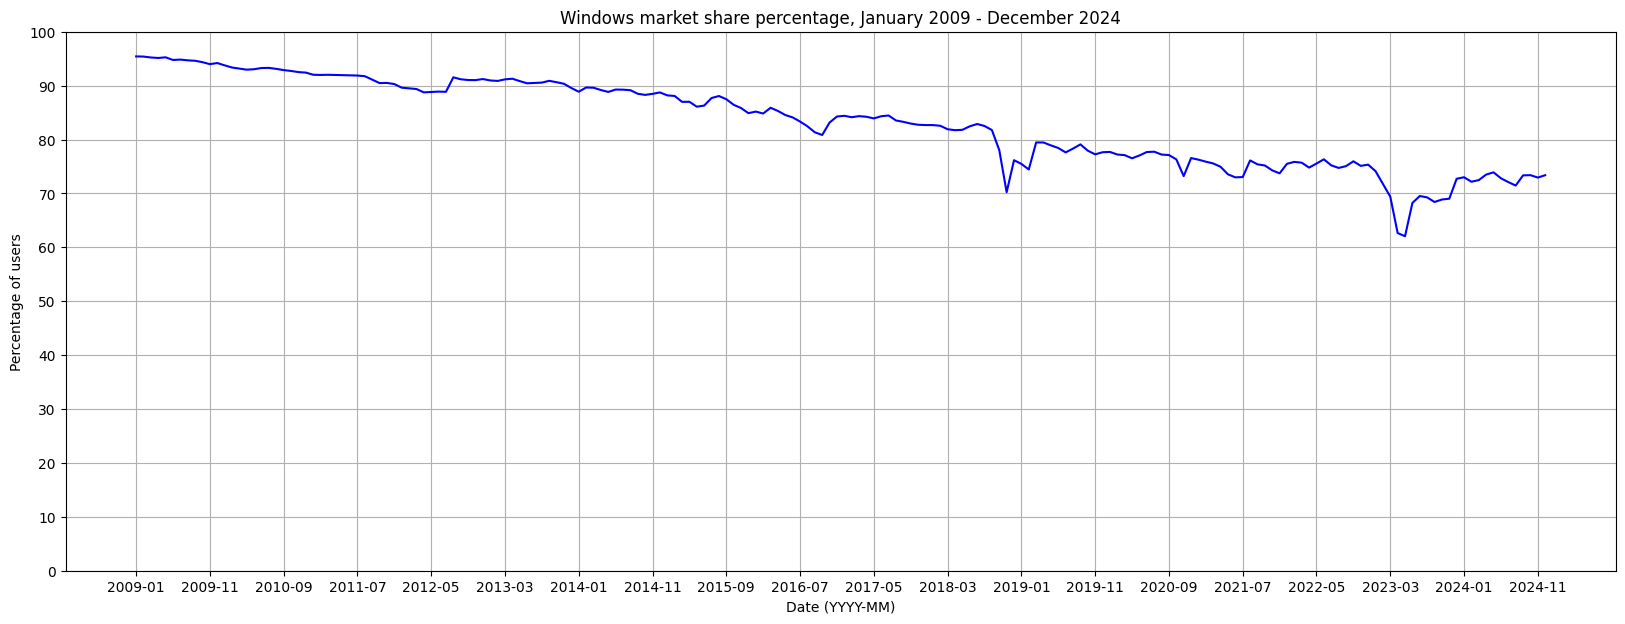

In [3]:
plt.figure(figsize=(20,7))
plt.grid(visible=True)
plt.ylim(0, 100)
plt.plot(market_share_data["Windows"], color="blue")
plt.title("Windows market share percentage, January 2009 - December 2024")
plt.xlabel("Date (YYYY-MM)")
plt.xticks(ticks=range(0, len(market_share_data["Date"]), 10), labels=market_share_data["Date"][::10])
plt.ylabel("Percentage of users")
plt.yticks(ticks=range(0, 101, 10))

([<matplotlib.axis.YTick at 0x1194ea0d0>,
 [Text(0, 0, '0'),
  Text(0, 1, '1'),
  Text(0, 2, '2'),
  Text(0, 3, '3'),
  Text(0, 4, '4'),
  Text(0, 5, '5'),
  Text(0, 6, '6'),
  Text(0, 7, '7'),
  Text(0, 8, '8'),
  Text(0, 9, '9'),
  Text(0, 10, '10')])

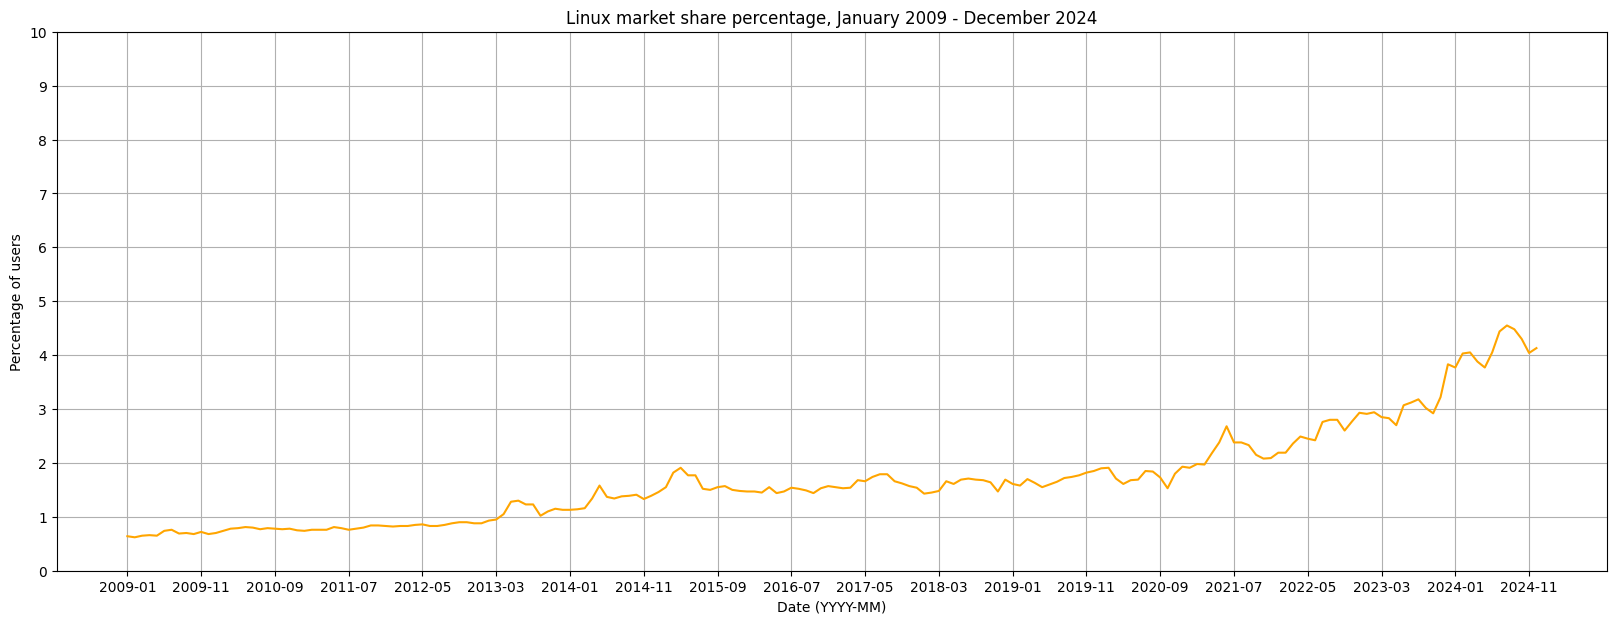

In [4]:
plt.figure(figsize=(20,7))
plt.grid(visible=True)
plt.ylim(0, 10)
plt.plot(market_share_data["Linux"], color="orange")
plt.title("Linux market share percentage, January 2009 - December 2024")
plt.xlabel("Date (YYYY-MM)")
plt.xticks(ticks=range(0, len(market_share_data["Date"]), 10), labels=market_share_data["Date"][::10])
plt.ylabel("Percentage of users")
plt.yticks(ticks=range(0, 11, 1))

Text(0, 0.5, 'Linux')

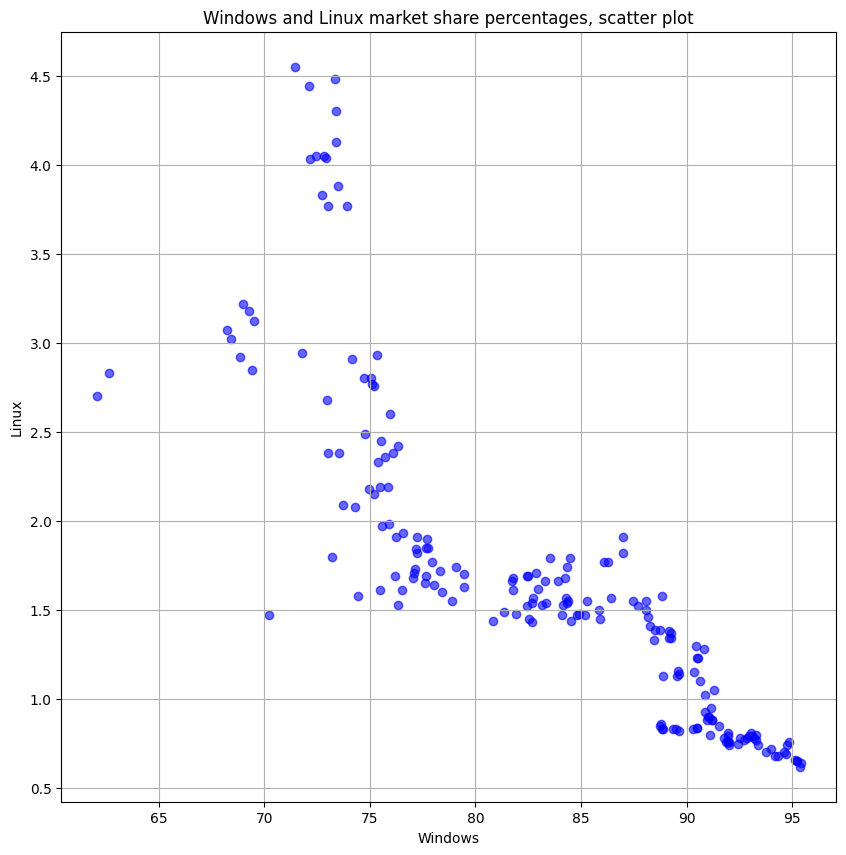

In [5]:
plt.figure(figsize=(10,10))
plt.grid(visible=True)
plt.scatter(market_share_data["Windows"], market_share_data["Linux"], c=["blue"], alpha=0.6)
plt.title("Windows and Linux market share percentages, scatter plot")
plt.xlabel("Windows")
plt.ylabel("Linux")

Windows market share mean:
Windows    83.144427
dtype: float64

Linux market share mean:
Linux    1.704948
dtype: float64


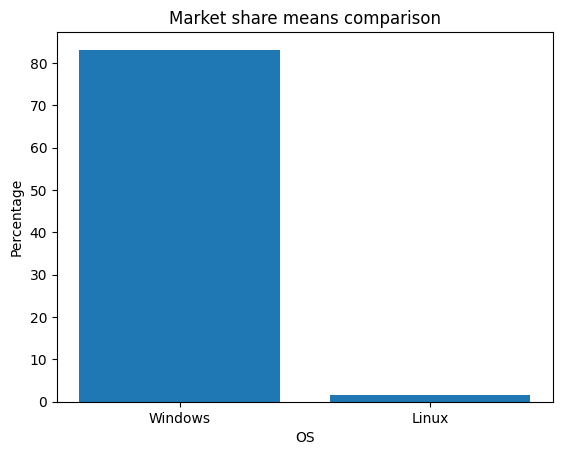

In [6]:
windows_marketshare_mean = market_share_data[["Windows"]].mean(axis=0,skipna=True)
linux_marketshare_mean = market_share_data[["Linux"]].mean(axis=0,skipna=True)

print(f"Windows market share mean:\n{windows_marketshare_mean}\n")
print(f"Linux market share mean:\n{linux_marketshare_mean}")

plt.bar(["Windows", "Linux"], [windows_marketshare_mean["Windows"], linux_marketshare_mean["Linux"]])
plt.title('Market share means comparison')
plt.xlabel('OS')
plt.ylabel('Percentage')
plt.show()

In [7]:
pageviews_data = pd.read_csv("data/wikipedia_pagevisit_counts/pageviews-20150701-20251124.csv")
# If any column has only NA values, drop it
pageviews_data.dropna(axis=1, how="all", inplace=True)
pageviews_data.drop(labels=["Windows XP"], axis=1, inplace=True)
pageviews_data.rename({"Red Hat Enterprise Linux": "RHEL"})
print(pageviews_data.head())
print(pageviews_data.tail())

         Date  Linux  Debian  Ubuntu  Red Hat Enterprise Linux  Windows 7  \
0  2015-07-01   6043    1406     497                      1185       3990   
1  2015-07-02   6185    1294     551                      1167       4035   
2  2015-07-03   5393    1110     449                       827       3535   
3  2015-07-04   4756     913     385                       373       3122   
4  2015-07-05   4415     942     381                       422       3600   

   Windows 8  Windows 8.1  Windows Vista  Windows 10  
0       3172         2278           1928       14676  
1       3072         2271           1981       13737  
2       2754         2070           1681       12776  
3       2542         1904           1554       10930  
4       2678         2116           1810       12144  
            Date  Linux  Debian  Ubuntu  Red Hat Enterprise Linux  Windows 7  \
3795  2025-11-20   3892    1430    1693                       742       2718   
3796  2025-11-21   3496    1322    1568        

['2016-11-01', '2016-12-11', '2017-01-20', '2017-03-01', '2017-04-10', '2017-05-20', '2017-06-29', '2017-08-08']


ValueError: Format 'csv' is not supported (supported formats: eps, jpeg, jpg, pdf, pgf, png, ps, raw, rgba, svg, svgz, tif, tiff, webp)

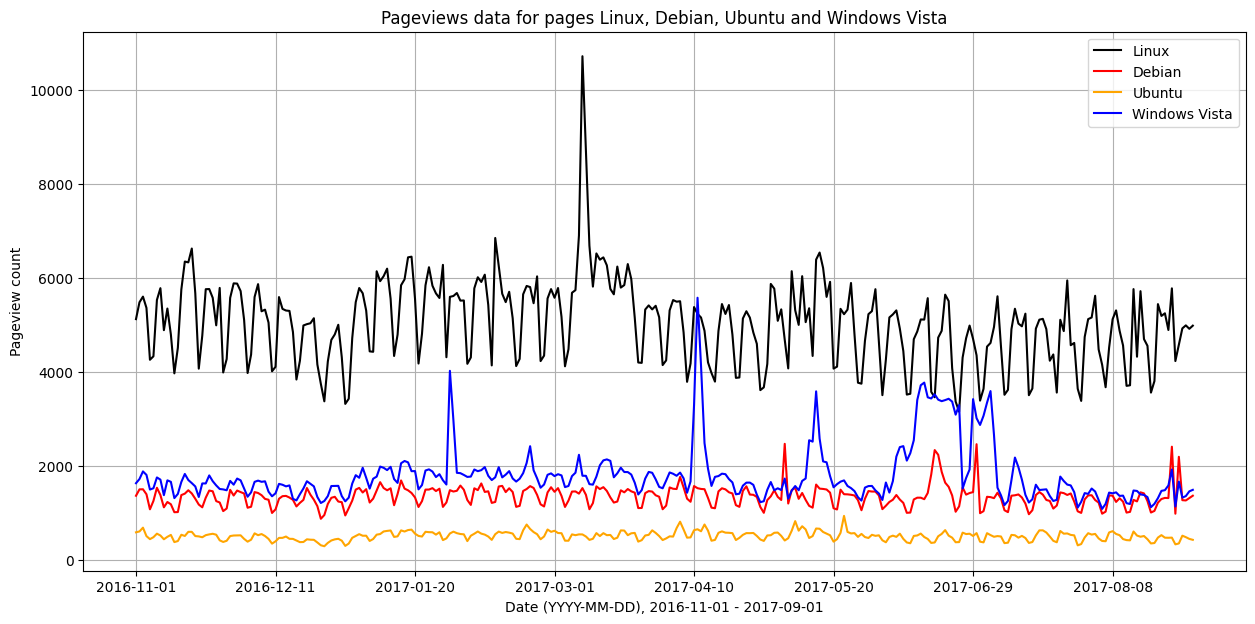

In [8]:
import datetime

plt.figure(figsize=(15,7))
plt.grid(visible=True)

data_start_period = datetime.date(year=2015, month=7, day=1)
winvista_start_period = datetime.date(year=2016, month=11, day=1)
winvista_end_period = datetime.date(year=2017, month=9, day=1)

number_of_days = (winvista_end_period-winvista_start_period).days
start_index = (winvista_start_period-data_start_period).days

plt.plot(pageviews_data["Linux"].iloc[start_index:start_index+number_of_days], color="black")
plt.plot(pageviews_data["Debian"].iloc[start_index:start_index+number_of_days], color="red")
plt.plot(pageviews_data["Ubuntu"].iloc[start_index:start_index+number_of_days], color="orange")
plt.plot(pageviews_data["Windows Vista"].iloc[start_index:start_index+number_of_days], color="blue")
plt.title("Pageviews data for pages Linux, Debian, Ubuntu and Windows Vista")

# End of support at 2017-04-11, so check the previous and the next period to observe the effect
plt.xlabel("Date (YYYY-MM-DD), 2016-11-01 - 2017-09-01")
x_labels = []
for i in range(8):
    x_labels.append(str(winvista_start_period + datetime.timedelta(days=40)*i))
    
print(x_labels)
plt.xticks(ticks=range(start_index, start_index+number_of_days, 40), labels=x_labels)
plt.ylabel("Pageview count")
plt.legend(["Linux", "Debian", "Ubuntu", "Windows Vista"])
plt.savefig("visuals/winwista_linux_debian_ubuntu_pageviews_plot.csv", format="csv")

In [ ]:
plt.figure(figsize=(15,7))
plt.grid(visible=True)

data_start_period = datetime.date(year=2015, month=7, day=1)
win7_start_period = datetime.date(year=2019, month=8, day=1)
win7_end_period = datetime.date(year=2020, month=6, day=1)

number_of_days = (win7_end_period-win7_start_period).days
start_index = (win7_start_period-data_start_period).days

plt.plot(pageviews_data["Linux"].iloc[start_index:start_index+number_of_days], color="black")
plt.plot(pageviews_data["Debian"].iloc[start_index:start_index+number_of_days], color="red")
plt.plot(pageviews_data["Ubuntu"].iloc[start_index:start_index+number_of_days], color="orange")
plt.plot(pageviews_data["Windows 7"].iloc[start_index:start_index+number_of_days], color="blue")
plt.title("Pageviews data for pages Linux, Debian, Ubuntu and Windows 7")

# End of support at 2020-01-14, so check the previous and the next period to observe the effect
plt.xlabel("Date (YYYY-MM-DD), 2019-08-01 - 2020-06-01")
x_labels = []
for i in range(8):
    x_labels.append(str(win7_start_period + datetime.timedelta(days=40)*i))
    
print(x_labels)
plt.xticks(ticks=range(start_index, start_index+number_of_days, 40), labels=x_labels)
plt.ylabel("Pageview count")
plt.legend(["Linux", "Debian", "Ubuntu", "Windows 7"])
plt.savefig("visuals/win7_linux_debian_ubuntu_pageviews_plot.csv", format="csv")

In [ ]:
plt.figure(figsize=(15,7))
plt.grid(visible=True)

data_start_period = datetime.date(year=2015, month=7, day=1)
win81_start_period = datetime.date(year=2022, month=8, day=1)
win81_end_period = datetime.date(year=2023, month=6, day=1)

number_of_days = (win81_end_period-win81_start_period).days
start_index = (win81_start_period-data_start_period).days

print(number_of_days)
print(start_index)

plt.plot(pageviews_data["Linux"].iloc[start_index:start_index+number_of_days], color="black")
plt.plot(pageviews_data["Debian"].iloc[start_index:start_index+number_of_days], color="red")
plt.plot(pageviews_data["Ubuntu"].iloc[start_index:start_index+number_of_days], color="orange")
# plt.plot(pageviews_data["Windows 8"].iloc[start_index:start_index+number_of_days], color="blue")
plt.plot(pageviews_data["Windows 8.1"].iloc[start_index:start_index+number_of_days], color="blue")
plt.title("Pageviews data for pages Linux, Debian, Ubuntu and Windows 8.1")

# End of support at 2023-01-10 (Windows 8.1), so plot the previous and the next period (5 months before, 5 months after) to observe the effect
plt.xlabel("Date (YYYY-MM-DD), 2022-08-01 - 2023-06-01")
x_labels = []
for i in range(8):
    x_labels.append(str(win81_start_period + datetime.timedelta(days=40)*i))
    
print(x_labels)
plt.xticks(ticks=range(start_index, start_index+number_of_days, 40), labels=x_labels)
plt.ylabel("Pageview count")
plt.legend(["Linux", "Debian", "Ubuntu", "Windows 8.1"])
plt.savefig("visuals/winw81_linux_debian_ubuntu_pageviews_plot.csv", format="csv")

In [ ]:
plt.figure(figsize=(15,7))
plt.grid(visible=True)

data_start_period = datetime.date(year=2015, month=7, day=1)
win10_start_period = datetime.date(year=2025, month=7, day=14)
win10_end_period = datetime.date(year=2025, month=11, day=25)

number_of_days = (win10_end_period-win10_start_period).days
start_index = (win10_start_period-data_start_period).days

plt.plot(pageviews_data["Linux"].iloc[start_index:start_index+number_of_days], color="black")
plt.plot(pageviews_data["Debian"].iloc[start_index:start_index+number_of_days], color="red")
plt.plot(pageviews_data["Ubuntu"].iloc[start_index:start_index+number_of_days], color="orange")
plt.plot(pageviews_data["Windows 10"].iloc[start_index:start_index+number_of_days], color="blue")
plt.title("Pageviews data for pages Linux, Debian, Ubuntu and Windows 10")

# End of support at 2025-10-14 (Windows 10), so plot the previous and the next period (3 months before, 1 months after) to observe the effect
plt.xlabel("Date (YYYY-MM-DD), 2025-07-14 - 2025-11-25")
x_labels = []
for i in range(8):
    x_labels.append(str(win10_start_period + datetime.timedelta(days=17)*i))
    
print(x_labels)
plt.xticks(ticks=range(start_index, start_index+number_of_days, 17), labels=x_labels)
plt.ylabel("Pageview count")
plt.legend(["Linux", "Debian", "Ubuntu", "Windows 10"])
plt.savefig("visuals/win10_linux_debian_ubuntu_pageviews_plot.csv", format="csv")

In [ ]:
import seaborn as sns

pageviews_data["Date"] = pd.to_datetime(pageviews_data["Date"])
correlation_matrix_pageviews = pageviews_data.corr()

plt.figure(figsize=(10,7))
hmap = sns.heatmap(correlation_matrix_pageviews, annot=True, cmap='crest')
plt.show()
fig = hmap.get_figure()
fig.savefig("visuals/heatmap_pageviewsdata.svg", bbox_inches="tight")

In [ ]:
import scipy
number_of_days = (win7_end_period-win7_start_period).days
start_index = (win7_start_period-data_start_period).days

windows7_pageviews = pageviews_data["Windows 7"].iloc[start_index:start_index+number_of_days]
linux_pageviews = pageviews_data["Linux"].iloc[start_index:start_index+number_of_days]


# To show the skewed distribution
plt.figure(figsize=(8, 5))
sns.histplot(windows7_pageviews, kde=True, bins=20)
plt.title('Windows 7 pageviews distribution')
plt.show()

windows7_pageviews_average = windows7_pageviews.mean(axis=0,skipna=True) 
windows7_pageviews_variance = np.var(windows7_pageviews)
linux_pageviews_average = linux_pageviews.mean(axis=0,skipna=True) 
linux_pageviews_variance = np.var(linux_pageviews)

print(f"Average: {windows7_pageviews_average}, {linux_pageviews_average}")
print(f"Variance: {windows7_pageviews_variance}, {linux_pageviews_variance}")

stat, p_val = scipy.stats.mannwhitneyu(windows7_pageviews, linux_pageviews) 
print(f"Statistic: {stat}, p-value: {p_val}")

In [ ]:
number_of_days = (win81_end_period-win81_start_period).days
start_index = (win81_start_period-data_start_period).days

windows81_pageviews = pageviews_data["Windows 8.1"].iloc[start_index:start_index+number_of_days]
linux_pageviews = pageviews_data["Linux"].iloc[start_index:start_index+number_of_days]

plt.figure(figsize=(8, 5))
sns.histplot(windows81_pageviews, kde=True, bins=20)
plt.title('Windows 8.1 pageviews distribution')
plt.show()

windows81_pageviews_average = windows81_pageviews.mean(axis=0,skipna=True) 
windows81_pageviews_variance = np.var(windows81_pageviews)
linux_pageviews_average = linux_pageviews.mean(axis=0,skipna=True) 
linux_pageviews_variance = np.var(linux_pageviews)

print(f"Average: {windows81_pageviews_average}, {linux_pageviews_average}")
print(f"Variance: {windows81_pageviews_variance}, {linux_pageviews_variance}")

stat, p_val = scipy.stats.mannwhitneyu(windows81_pageviews, linux_pageviews) 
print(f"statistic: {stat}, p-value: {p_val}")

In [ ]:
number_of_days = (win10_end_period-win10_start_period).days
start_index = (win10_start_period-data_start_period).days

windows10_pageviews = pageviews_data["Windows 10"].iloc[start_index:start_index+number_of_days]
linux_pageviews = pageviews_data["Linux"].iloc[start_index:start_index+number_of_days]

plt.figure(figsize=(8, 5))
sns.histplot(windows10_pageviews, kde=True, bins=20)
plt.title('Windows 10 pageviews distribution')
plt.show()

windows10_pageviews_average = windows10_pageviews.mean(axis=0,skipna=True) 
windows10_pageviews_variance = np.var(windows10_pageviews)
linux_pageviews_average = linux_pageviews.mean(axis=0,skipna=True) 
linux_pageviews_variance = np.var(linux_pageviews)

print(f"Average: {windows10_pageviews_average}, {linux_pageviews_average}")
print(f"Variance: {windows10_pageviews_variance}, {linux_pageviews_variance}")

stat, p_val = scipy.stats.mannwhitneyu(windows10_pageviews, linux_pageviews) 
print(f"statistic: {stat}, p-value: {p_val}")